# <h1 style="color:blue; text-align:center; text-decoration:underline;"> Python Avancé : Analyse d’article de presse</h1>

**Objectif:** L'objectif de ce projet est de concevoir une solution capable de classifier automatiquement des articles de presse selon leur thématique principale en utilisant des techniques de traitement du langage naturel (NLP) et d’apprentissage automatique.

# 1. Préparation des données

Avant d'analyser les articles de presse, nous commençons par charger et explorer les fichiers disponibles. Cette section décompresse l'archive contenant les articles, liste les fichiers extraits et affiche un aperçu du contenu du dossier.

In [ ]:
# Liste des fichiers présents dans le répertoire /content/
import os
print("Fichiers dans /content/ :", os.listdir("/content/"))


Fichiers dans /content/ : ['.config', 'Articles.zip', 'sample_data']


In [ ]:
# Décompresse un fichier ZIP dans un dossier spécifié
import zipfile

zip_path = "/content/Articles.zip"  # Chemin du fichier ZIP
extract_path = "/content/Articles/"  # Dossier où extraire

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée !")
print("Fichiers extraits dans :", os.listdir(extract_path))


Extraction terminée !
Fichiers extraits dans : ['Articles']


In [ ]:
# Affichage des dossiers et des 5 premiers fichiers dans chaque dossier
for root, dirs, files in os.walk("/content/Articles/"):
    print(f"Dossier : {root}")
    print(f"Fichiers : {files[:5]}")
    print("-" * 50)


Dossier : /content/Articles/
Fichiers : []
--------------------------------------------------
Dossier : /content/Articles/Articles
Fichiers : ['article_sport947.txt', 'article_science46.txt', 'article_sport480.txt', 'article_sport983.txt', 'article_science308.txt']
--------------------------------------------------


In [ ]:
# Chemin vers le répertoire des articles
DATA_DIR = "/content/Articles/Articles/"



In [ ]:
# Afficher les 10 premiers fichiers
import os
print("Fichiers trouvés :", os.listdir(DATA_DIR)[:10])


Fichiers trouvés : ['article_sport947.txt', 'article_science46.txt', 'article_sport480.txt', 'article_sport983.txt', 'article_science308.txt', 'article_sport563.txt', 'article_economie63.txt', 'article_economie30.txt', 'article_science266.txt', 'article_science366.txt']


Nous commençons par importer les bibliothèques nécessaires pour le traitement du texte, l'apprentissage automatique et la visualisation des résultats.

In [ ]:
# Importation des bibliotiques:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Téléchargement des ressources NLTK

**NLTK** est utilisé pour le traitement du langage naturel. Nous téléchargeons les ressources nécessaires, notamment les stopwords et le tokenizer.

In [ ]:
# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 3. Chemin des articles

Nous définissons le chemin d'accès aux articles, listons les fichiers disponibles et filtrons uniquement les fichiers texte à analyser.

In [ ]:
# Chemin des articles
import os

ARTICLE_PATH = "/content/Articles/Articles/"

files = [file for file in os.listdir(ARTICLE_PATH) if file.endswith(".txt")]
#print(f"Fichiers trouvés : {files}")


# 4. Lecture des fichiers textes

Les articles sont extraits et transformés en un format exploitable. Nous récupérons le titre, le résumé et le texte complet. De plus, nous assignons une catégorie à chaque article en fonction de son nom de fichier.

In [ ]:
# Lecture des fichiers textes
article_data = []
labels = []

for file in os.listdir(ARTICLE_PATH):
    if file.endswith(".txt"):
        with open(os.path.join(ARTICLE_PATH, file), "r", encoding="utf-8") as f:
            lines = f.readlines()


          #  print(f"Fichier {file} : Nombre de lignes = {len(lines)}")
           # print(f"Premiers caractères du fichier : {''.join(lines[:2])[:200]}")  # Affiche les 2 premières lignes du fichier

            if len(lines) >= 3:
                title = lines[0].strip()
                summary = lines[1].strip()
                full_text = " ".join(line.strip() for line in lines[2:])
                article_data.append((title, summary, full_text))


                if "sport" in file.lower():
                    labels.append("Sport")
                elif "economie" in file.lower():
                    labels.append("Economie")
                elif "science" in file.lower():
                    labels.append("Science")
                else:
                    labels.append("Autre")  # Cas où le fichier n'a pas de catégorie explicite
            else:
                print(f"Le fichier {file} n'a pas assez de lignes.")
       #  print(f"Articles après lecture du fichier {file} : {len(article_data)}")

# Vérification du nombre d'articles chargés et des premières lignes
print(f"Nombre d'articles chargés : {len(article_data)}")
if article_data:
    print("Quelques articles chargés :")
    # print(article_data[:2])  # Affiche les deux premiers articles pour vérification


Nombre d'articles chargés : 3681
Quelques articles chargés :


# 5. Création d'un DataFrame

Une fois les articles extraits et catégorisés, nous les structurons sous forme d’un DataFrame Pandas pour faciliter l’analyse et la manipulation des données.

In [ ]:
# Création d'un DataFrame à partir des données d'articles et l'ajout de la colonne 'Catégorie'
article_df = pd.DataFrame(article_data, columns=["Titre", "Résumé", "Texte"])
article_df["Catégorie"] = labels

# Vérification du DataFrame
print(f"Shape du DataFrame : {article_df.shape}")
print(f"Quelques lignes du DataFrame :\n{article_df.head()}")


Shape du DataFrame : (3681, 4)
Quelques lignes du DataFrame :
                                               Titre Résumé  \
0  JO de Paris 2024 : les pépites histoires des e...          
1  La calculatrice, premier numéro des énigmes ma...          
2  JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...          
3  Fortes pluies, vents violents… Mayotte placée ...          
4  Le module spatial japonais « Moon Sniper » s’e...          

                                               Texte Catégorie  
0  Exploits des athlètes, discussion avec les coa...     Sport  
1  Chaque semaine, le mathématicien Mickaël Launa...   Science  
2  Les nageurs fran√ßais Cl√©ment Secchi et Yohan...     Sport  
3  L’île, détruite en décembre par le cyclone Chi...     Sport  
4  Ce module spatial SLIM devait non seulement al...   Science  


# 6. Affichage de quelques lignes

In [ ]:
# Affichage de quelques lignes
display(article_df.head())

,Titre,Résumé,Texte,Catégorie
0,JO de Paris 2024 : les pépites histoires des e...,,"Exploits des athlètes, discussion avec les coa...",Sport
1,"La calculatrice, premier numéro des énigmes ma...",,"Chaque semaine, le mathématicien Mickaël Launa...",Science
2,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...,,Les nageurs fran√ßais Cl√©ment Secchi et Yohan...,Sport
3,"Fortes pluies, vents violents… Mayotte placée ...",,"L’île, détruite en décembre par le cyclone Chi...",Sport
4,Le module spatial japonais « Moon Sniper » s’e...,,Ce module spatial SLIM devait non seulement al...,Science


# 7. Nettoyage et prétraitement des textes

In [ ]:
display(article_df.head())

,Titre,Résumé,Texte,Catégorie
0,JO de Paris 2024 : les pépites histoires des e...,,"Exploits des athlètes, discussion avec les coa...",Sport
1,"La calculatrice, premier numéro des énigmes ma...",,"Chaque semaine, le mathématicien Mickaël Launa...",Science
2,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...,,Les nageurs fran√ßais Cl√©ment Secchi et Yohan...,Sport
3,"Fortes pluies, vents violents… Mayotte placée ...",,"L’île, détruite en décembre par le cyclone Chi...",Sport
4,Le module spatial japonais « Moon Sniper » s’e...,,Ce module spatial SLIM devait non seulement al...,Science


# 8. Définition des ensembles de données

Pour évaluer l'impact de la longueur et de la combinaison des informations sur la performance de la classification, nous créons plusieurs versions du texte. Chaque version combine différentes parties des articles: uniquement le titre, le titre avec le résumé, et le titre avec le résumé et le texte complet.

In [ ]:
# # Création des différentes versions du texte en combinant les colonnes "Titre", "Résumé" et "Texte"
article_df["Version1"] = article_df["Titre"]
article_df["Version2"] = article_df["Titre"] + " " + article_df["Résumé"]
article_df["Version3"] = article_df["Titre"] + " " + article_df["Résumé"] + " " + article_df["Texte"]
display(article_df.head())

,Titre,Résumé,Texte,Catégorie,Version1,Version2,Version3
0,JO de Paris 2024 : les pépites histoires des e...,,"Exploits des athlètes, discussion avec les coa...",Sport,JO de Paris 2024 : les pépites histoires des e...,JO de Paris 2024 : les pépites histoires des e...,JO de Paris 2024 : les pépites histoires des e...
1,"La calculatrice, premier numéro des énigmes ma...",,"Chaque semaine, le mathématicien Mickaël Launa...",Science,"La calculatrice, premier numéro des énigmes ma...","La calculatrice, premier numéro des énigmes ma...","La calculatrice, premier numéro des énigmes ma..."
2,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...,,Les nageurs fran√ßais Cl√©ment Secchi et Yohan...,Sport,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...,JO¬†2024¬†: des m√©dailles de bronze s‚Äôab√Æm...
3,"Fortes pluies, vents violents… Mayotte placée ...",,"L’île, détruite en décembre par le cyclone Chi...",Sport,"Fortes pluies, vents violents… Mayotte placée ...","Fortes pluies, vents violents… Mayotte placée ...","Fortes pluies, vents violents… Mayotte placée ..."
4,Le module spatial japonais « Moon Sniper » s’e...,,Ce module spatial SLIM devait non seulement al...,Science,Le module spatial japonais « Moon Sniper » s’e...,Le module spatial japonais « Moon Sniper » s’e...,Le module spatial japonais « Moon Sniper » s’e...


# 9. Séparation entraînement/test

Les données sont ensuite divisées en un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement sera utilisé pour apprendre les modèles, tandis que l'ensemble de test permettra d’évaluer leur performance. Nous choisissons une proportion de 30 % pour l’ensemble de test afin de garantir une évaluation robuste tout en préservant une quantité suffisante de données pour l'apprentissage.

In [ ]:
# Séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(article_df["Texte"], article_df["Catégorie"], test_size=0.3, random_state=42)


#  10. Transformation TF-IDF

Les articles textuels doivent être convertis en une représentation numérique que les modèles de machine learning peuvent comprendre. Pour ce faire, nous appliquons la méthode TF-IDF (Term Frequency-Inverse Document Frequency), qui attribue un poids à chaque mot en fonction de sa fréquence dans un article et de sa rareté dans l'ensemble des documents. Cette transformation nous permet de transformer le texte brut en une matrice de caractéristiques que nous pouvons utiliser pour entraîner nos modèles.

In [ ]:
# Application de TF-IDF pour vectoriser les données d'entraînement et de test
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# 11. Choix des modèles de classification

Nous testons plusieurs modèles de classification pour déterminer lequel donne les meilleurs résultats sur nos données. Les modèles choisis sont le Bayes Naïf, le SVM, la Forêt Aléatoire et la Régression Logistique, qui sont bien adaptés à la classification de texte.

In [ ]:
# Définir différents modèles de classification à tester
model_choices = {
    "Bayes Naïf": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Forêt Aléatoire": RandomForestClassifier(n_estimators=100),
    "Régression Logistique": LogisticRegression(max_iter=1000)
}

performance_results = {}


# 12. Entraînement des modèles et évaluation

In [ ]:
# Entraînement et évaluation de chaque modèle puis affichage des résultat
for model_name, model in model_choices.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    performance_results[model_name] = accuracy
    print(f"\nModèle testé : {model_name}")
    print(classification_report(y_test, y_pred))



Modèle testé : Bayes Naïf
              precision    recall  f1-score   support

    Economie       0.87      0.91      0.89       362
     Science       0.96      0.84      0.89       368
       Sport       0.87      0.94      0.90       375

    accuracy                           0.90      1105
   macro avg       0.90      0.89      0.89      1105
weighted avg       0.90      0.90      0.89      1105


Modèle testé : SVM
              precision    recall  f1-score   support

    Economie       0.90      0.93      0.91       362
     Science       0.94      0.92      0.93       368
       Sport       0.94      0.93      0.93       375

    accuracy                           0.92      1105
   macro avg       0.93      0.92      0.92      1105
weighted avg       0.93      0.92      0.92      1105


Modèle testé : Forêt Aléatoire
              precision    recall  f1-score   support

    Economie       0.87      0.91      0.89       362
     Science       0.93      0.88      0.90       

 Précision et Recall par Catégorie

  Économie : Recall ≈ 0.93 → 93% des articles économiques sont bien détectés.
    
  Science : Recall ≈ 0.90 → 90% des articles scientifiques sont bien classés.
     
  Sport : Recall ≈ 0.89 → 89% des articles sportifs sont bien identifiés.

# 13. Visualisation des performances

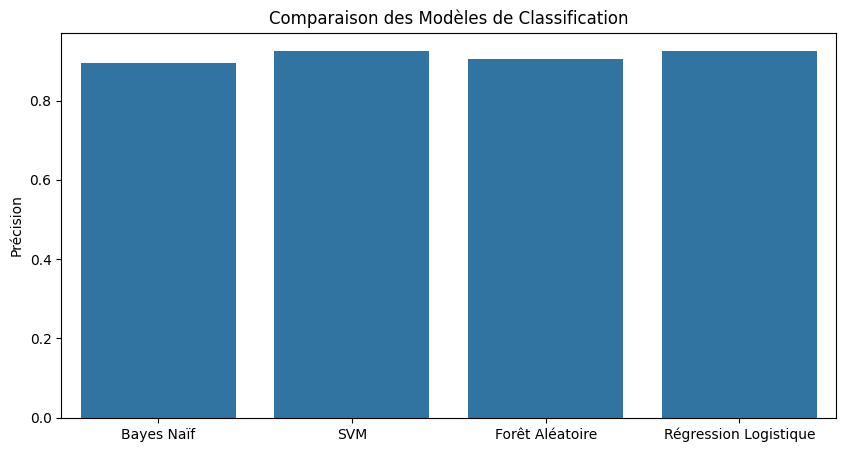

In [ ]:
# Visualisation des performances
plt.figure(figsize=(10,5))
sns.barplot(x=list(performance_results.keys()), y=list(performance_results.values()))
plt.ylabel("Précision")
plt.title("Comparaison des Modèles de Classification")
plt.show()

# 14. Amélioration des Modèles (Matrice de confusion)


Une fois que les modèles ont été entraînés et les prédictions effectuées, il est crucial d’évaluer la performance de ces modèles en utilisant des métriques appropriées. La matrice de confusion est un excellent outil pour analyser la précision des prédictions et comprendre les erreurs. Elle permet de visualiser le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs, ce qui aide à évaluer les performances des modèles de manière détaillée.

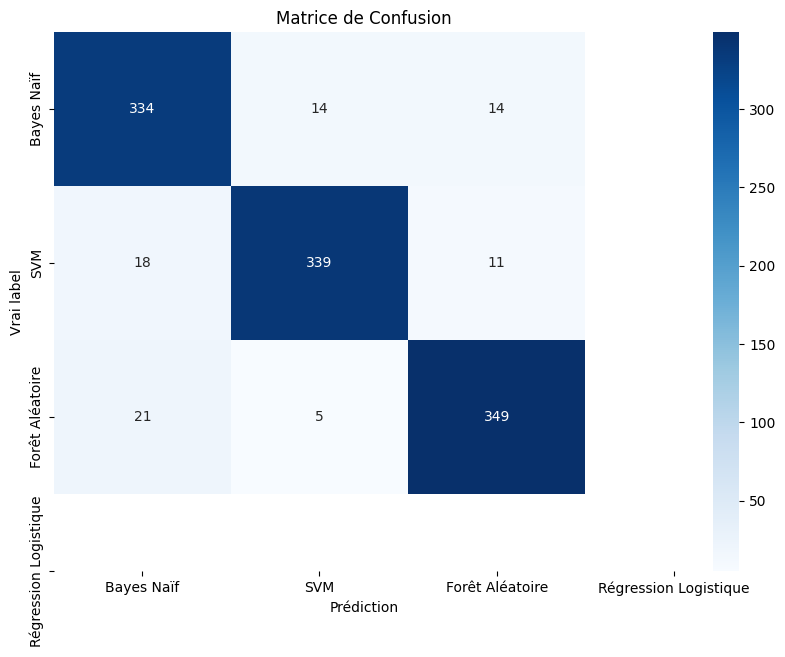

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_choices.keys(), yticklabels=model_choices.keys())
plt.ylabel('Vrai label')
plt.xlabel('Prédiction')
plt.title('Matrice de Confusion')
plt.show()


 Peu d'articles sont classés à tort dans une autre catégorie.

* **Économie vs Science:** Certains articles économiques sont classés en science. Cela pourrait être dû à des sujets comme l'économie de l’innovation ou les nouvelles technologies.


* **Sport vs Économie:** Une confusion possible entre les articles sur les finances du sport (ex: budgets des clubs).

# 15. Optimisation de la Vectorisation TF-IDF

 On ajoute n-grammes (1,2) et limitation du vocabulaire aux 5000 mots les plus pertinents.

In [ ]:
# Application  de TF-IDF avec des n-grams (1,2) et limiter à 5000 caractéristiques
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 16. Convertir les Labels en Nombres

In [ ]:
# Encoder les étiquettes de classe en valeurs numériques
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


print("Mapping des catégories :", dict(enumerate(label_encoder.classes_)))


Mapping des catégories : {0: 'Economie', 1: 'Science', 2: 'Sport'}


# 17. Amélioration du Modèle avec XGBoost

Pour améliorer les performances du modèle, nous appliquons XGBoost, un algorithme de boosting qui est particulièrement efficace pour la classification, en particulier pour des données textuelles complexes. Ce modèle sera comparé aux autres pour voir s'il peut offrir des résultats supérieurs.

In [ ]:
# Amélioration du Modèle avec XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")


xgb_model.fit(X_train_tfidf, y_train_encoded)


y_pred_xgb_encoded = xgb_model.predict(X_test_tfidf)


y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)


print("Performance de XGBoost :")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance de XGBoost :
              precision    recall  f1-score   support

    Economie       0.86      0.90      0.88       362
     Science       0.92      0.86      0.89       368
       Sport       0.91      0.93      0.92       375

    accuracy                           0.90      1105
   macro avg       0.90      0.90      0.90      1105
weighted avg       0.90      0.90      0.90      1105



# 18. Courbe ROC pour Évaluer XGBoost

Une fois les modèles entraînés, nous utilisons la courbe ROC (Receiver Operating Characteristic) pour évaluer leur performance en termes de taux de faux positifs et de vrais positifs. Cette courbe permet de mieux comprendre comment chaque modèle classifie les articles et de comparer leur capacité à discriminer entre les différentes catégories.

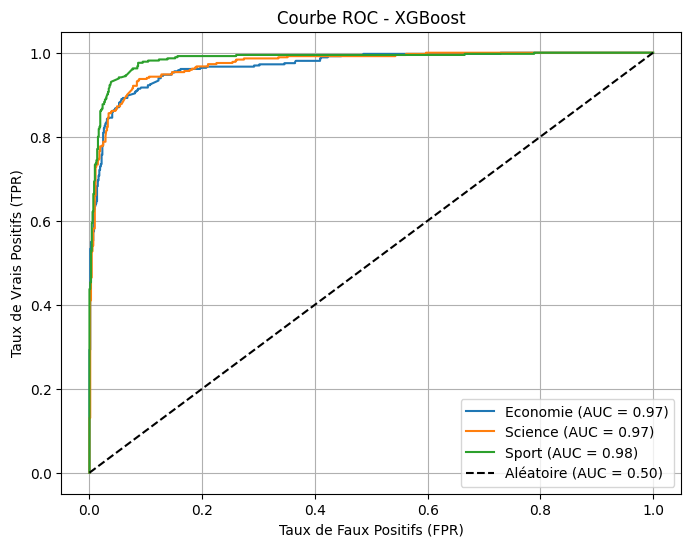

In [ ]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


y_proba_xgb = xgb_model.predict_proba(X_test_tfidf)


plt.figure(figsize=(8,6))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire (AUC = 0.50)")


plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


 Trois courbes ROC (une par catégorie : Économie, Science, Sport)

 **AUC > 0.8** , Très bon modèle

# 19. Régression Logistique avec spaCy et Scikit-learn

  Construsons Maintenat un modèle de régression logistique capable de classifier un nouvel article et de l'assigner automatiquement à sa thématique (Économie, Science, Sport).

In [ ]:
# Télécharger le modèle linguistique français de spaCy
import subprocess
subprocess.run(["python", "-m", "spacy", "download", "fr_core_news_sm"])


CompletedProcess(args=['python', '-m', 'spacy', 'download', 'fr_core_news_sm'], returncode=0)

In [ ]:
# Charger le modèle linguistique français de spaCy
import spacy
nlp = spacy.load("fr_core_news_sm")
print(" spaCy est prêt !")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


 spaCy est prêt !


In [ ]:
# Fonction de prétraitement du texte (lemmatisation, stopwords et ponctuation supprimés)
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(words)

print(" Fonction de prétraitement prête !")


 Fonction de prétraitement prête !


Avant de commencer à utiliser ou à entraîner nos modèles, il est essentiel de vérifier si les fichiers sauvegardés existent déjà. Cela nous permet d'éviter de réentraîner un modèle ou un vectoriseur inutilement, et de gagner du temps si des objets préexistants sont déjà disponibles.

In [ ]:
import joblib
import os

# Vérifier si les fichiers existent
if os.path.exists("logistic_model.pkl") and os.path.exists("tfidf_vectorizer.pkl") and os.path.exists("label_encoder.pkl"):
    print(" Modèle et vectoriseur trouvés, prêts à être utilisés !")
else:
    print(" Modèle non trouvé, il faut l'entraîner avant.")


 Modèle et vectoriseur trouvés, prêts à être utilisés !


Après avoir chargé nos modèles ou objets nécessaires, il est important de vérifier les catégories qui ont été apprises par le modèle, en particulier pour l'encodeur de labels. Cela nous permet de nous assurer que les catégories correspondent bien à celles que nous avons définies.

In [ ]:
# le label encoder
label_encoder = joblib.load("label_encoder.pkl")

# Vérifions les catégories apprises par le modèle
print("Catégories dans le modèle :", label_encoder.classes_)


Catégories dans le modèle : ['Economie' 'Science' 'Sport']


Il se peut que les catégories utilisées dans le modèle ne soient pas correctes ou qu'elles aient été modifiées. Dans ce cas, nous devons réentraîner le label encoder avec les catégories correctes et les sauvegarder à nouveau pour garantir la cohérence du modèle.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Réentrainons l'encodeur avec les bonnes catégories
label_encoder = LabelEncoder()
labels_corrects = ["Economie", "Science", "Sport"]
label_encoder.fit(labels_corrects)

# Sauvegardons à nouveau
joblib.dump(label_encoder, "label_encoder.pkl")
print(" LabelEncoder corrigé et sauvegardé !")


 LabelEncoder corrigé et sauvegardé !


# Testons la Classification d’un Nouvel Article

Enfin, nous implémentons une fonction permettant de classer un nouvel article en utilisant le modèle entraîné. Cette fonction prend un texte brut, le prétraite, puis le transforme en une représentation vectorielle avant de prédire sa catégorie.

In [ ]:
def classifier_article(nouveau_texte):
    logistic_model = joblib.load("logistic_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    label_encoder = joblib.load("label_encoder.pkl")

    # Prétraitement avec spaCy
    texte_clean = preprocess_text_spacy(nouveau_texte)

    # Vectorisation
    texte_vectorisé = vectorizer.transform([texte_clean])


    prediction = logistic_model.predict(texte_vectorisé)

    # Vérification de la sortie brute
    print("Valeur brute prédite :", prediction[0])

    if isinstance(prediction[0], str):
        return prediction[0]

    categorie_predite = label_encoder.inverse_transform(prediction)[0]

    return categorie_predite

# Test avec un nouvel article
nouvel_article = "Le marché boursier connaît une forte volatilité en raison de la crise économique mondiale."
categorie = classifier_article(nouvel_article)
print(f" L'article est classé dans la catégorie : {categorie}")


Valeur brute prédite : Economie
 L'article est classé dans la catégorie : Economie


## Travail réussi !
Fin.